In [1]:
import numpy as np
import pandas as pd
from sqlalchemy import create_engine

In [2]:
engine = create_engine('postgresql://ubuntu@18.218.203.43:5432/metis-project-3')
df = pd.read_sql_table('bank', con=engine)

# Data Exploration
---

#### Checking for null values

In [3]:
df.isnull().any()

index        False
age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

In [4]:
df.sample(5)

,index,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
2909,2909,39,admin.,married,secondary,no,406,no,no,cellular,30,jul,253,5,-1,0,unknown,no
2641,2641,73,retired,married,secondary,no,19,no,no,cellular,5,nov,509,2,-1,0,unknown,no
2199,2199,35,admin.,divorced,secondary,no,148,no,yes,cellular,8,jul,199,1,-1,0,unknown,no
237,237,57,technician,married,unknown,no,206,yes,no,unknown,5,may,216,3,-1,0,unknown,no
616,616,28,management,single,tertiary,no,231,yes,yes,cellular,25,jul,568,2,-1,0,unknown,no


In [5]:
for col in df:
    print(col,sorted(df[col].unique()),'\n')

index [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220

In [6]:
df.describe()

,index,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,2260.000000,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,1305.244613,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,0.000000,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,1130.000000,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,2260.000000,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,3390.000000,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,4520.000000,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


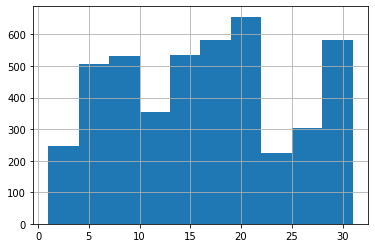

In [9]:
%matplotlib inline
df.day.hist()

|Schema|Name|Type|Owner|Count|
|:---|:---|:---|:---|:---|
|public|bank|table|ubuntu|
|public|bank_additional|table|ubuntu|
|public|bank_additional_full|table|ubuntu|
|public|bank_full|table|ubuntu|
 
 


|count|
|---|
|41188|

In [13]:
for i in engine.execute('select * from bank where bank is not null'):
    print(i)

(0, 30, 'unemployed', 'married', 'primary', 'no', 1787, 'no', 'no', 'cellular', 19, 'oct', 79, 1, -1, 0, 'unknown', 'no')
(1, 33, 'services', 'married', 'secondary', 'no', 4789, 'yes', 'yes', 'cellular', 11, 'may', 220, 1, 339, 4, 'failure', 'no')
(2, 35, 'management', 'single', 'tertiary', 'no', 1350, 'yes', 'no', 'cellular', 16, 'apr', 185, 1, 330, 1, 'failure', 'no')
(3, 30, 'management', 'married', 'tertiary', 'no', 1476, 'yes', 'yes', 'unknown', 3, 'jun', 199, 4, -1, 0, 'unknown', 'no')
(4, 59, 'blue-collar', 'married', 'secondary', 'no', 0, 'yes', 'no', 'unknown', 5, 'may', 226, 1, -1, 0, 'unknown', 'no')
(5, 35, 'management', 'single', 'tertiary', 'no', 747, 'no', 'no', 'cellular', 23, 'feb', 141, 2, 176, 3, 'failure', 'no')
(6, 36, 'self-employed', 'married', 'tertiary', 'no', 307, 'yes', 'no', 'cellular', 14, 'may', 341, 1, 330, 2, 'other', 'no')
(7, 39, 'technician', 'married', 'secondary', 'no', 147, 'yes', 'no', 'cellular', 6, 'may', 151, 2, -1, 0, 'unknown', 'no')
(8, 41, 

(2337, 24, 'services', 'married', 'tertiary', 'no', 0, 'yes', 'no', 'unknown', 27, 'may', 299, 1, -1, 0, 'unknown', 'no')
(2338, 29, 'unemployed', 'married', 'secondary', 'no', 596, 'no', 'no', 'cellular', 30, 'jan', 510, 2, -1, 0, 'unknown', 'no')
(2339, 54, 'blue-collar', 'married', 'secondary', 'no', 2059, 'yes', 'no', 'cellular', 25, 'aug', 177, 4, -1, 0, 'unknown', 'no')
(2340, 27, 'admin.', 'married', 'secondary', 'no', 132, 'no', 'no', 'cellular', 13, 'oct', 123, 2, -1, 0, 'unknown', 'no')
(2341, 34, 'management', 'married', 'secondary', 'no', 0, 'no', 'no', 'cellular', 2, 'feb', 270, 1, -1, 0, 'unknown', 'no')
(2342, 39, 'blue-collar', 'married', 'primary', 'no', 385, 'yes', 'no', 'unknown', 16, 'may', 225, 4, -1, 0, 'unknown', 'no')
(2343, 38, 'management', 'married', 'tertiary', 'no', 223, 'no', 'no', 'cellular', 28, 'jan', 63, 1, -1, 0, 'unknown', 'no')
(2344, 37, 'management', 'married', 'tertiary', 'no', 0, 'yes', 'no', 'unknown', 3, 'jun', 247, 13, -1, 0, 'unknown', 'no')